Exploratory Data Analysis

In [9]:
import pandas as pd
import numpy as np
import plotly.express as px

In [29]:
# Load the data from the CSV file
data = pd.read_csv('../Data/Case Study S&O Exercise.csv')

# Display the first few rows of the dataframe
data.head()

,CUSTOMER_PLACE_ORDER_DATETIME,PLACED_ORDER_WITH_RESTAURANT_DATETIME,DRIVER_AT_RESTAURANT_DATETIME,DELIVERED_TO_CUSTOMER_DATETIME,DRIVER_ID,RESTAURANT_ID,CUSTOMER_ID,DELIVERY_REGION,IS_ASAP,ORDER_TOTAL,DISCOUNT_AMOUNT,TIP_AMOUNT,REFUNDED_AMOUNT
0,9/20/2024 22:08:51,9/20/2024 22:08:52,9/20/2024 22:16:03,9/20/2024 22:31:23,36828872.0,11000,22130617,San Francisco,True,$32.38,$0.00,$4.50,$0.00
1,9/21/2024 1:50:46,9/21/2024 1:50:46,9/21/2024 2:14:55,9/21/2024 2:41:15,33495972.0,11000,46519725,San Francisco,True,$14.44,$2.99,$1.00,$0.00
2,9/21/2024 1:15:33,9/21/2024 1:15:33,9/21/2024 1:34:20,9/21/2024 1:57:22,29473770.0,11000,9410091,San Francisco,True,$59.67,$0.00,$7.00,$0.00
3,9/20/2024 20:35:16,9/20/2024 20:35:16,9/20/2024 20:46:12,9/20/2024 20:57:16,33606300.0,11000,128056625,San Francisco,True,$39.30,$0.00,$3.00,$0.00
4,9/21/2024 3:39:37,9/21/2024 3:39:37,9/21/2024 3:47:27,9/21/2024 4:04:13,29614391.0,11000,382291723,San Francisco,True,$24.71,$0.00,$2.50,$0.00


In [30]:
# Convert the datetime columns to datetime objects and set them to UTC timezone
datetime_columns = [
    'CUSTOMER_PLACE_ORDER_DATETIME',
    'PLACED_ORDER_WITH_RESTAURANT_DATETIME',
    'DRIVER_AT_RESTAURANT_DATETIME',
    'DELIVERED_TO_CUSTOMER_DATETIME'
]

for col in datetime_columns:
    data[col] = pd.to_datetime(data[col], errors='coerce').dt.tz_localize('UTC').dt.tz_convert('US/Pacific')

# Display the updated dataframe
data.head()

,CUSTOMER_PLACE_ORDER_DATETIME,PLACED_ORDER_WITH_RESTAURANT_DATETIME,DRIVER_AT_RESTAURANT_DATETIME,DELIVERED_TO_CUSTOMER_DATETIME,DRIVER_ID,RESTAURANT_ID,CUSTOMER_ID,DELIVERY_REGION,IS_ASAP,ORDER_TOTAL,DISCOUNT_AMOUNT,TIP_AMOUNT,REFUNDED_AMOUNT
0,2024-09-20 15:08:51-07:00,2024-09-20 15:08:52-07:00,2024-09-20 15:16:03-07:00,2024-09-20 15:31:23-07:00,36828872.0,11000,22130617,San Francisco,True,$32.38,$0.00,$4.50,$0.00
1,2024-09-20 18:50:46-07:00,2024-09-20 18:50:46-07:00,2024-09-20 19:14:55-07:00,2024-09-20 19:41:15-07:00,33495972.0,11000,46519725,San Francisco,True,$14.44,$2.99,$1.00,$0.00
2,2024-09-20 18:15:33-07:00,2024-09-20 18:15:33-07:00,2024-09-20 18:34:20-07:00,2024-09-20 18:57:22-07:00,29473770.0,11000,9410091,San Francisco,True,$59.67,$0.00,$7.00,$0.00
3,2024-09-20 13:35:16-07:00,2024-09-20 13:35:16-07:00,2024-09-20 13:46:12-07:00,2024-09-20 13:57:16-07:00,33606300.0,11000,128056625,San Francisco,True,$39.30,$0.00,$3.00,$0.00
4,2024-09-20 20:39:37-07:00,2024-09-20 20:39:37-07:00,2024-09-20 20:47:27-07:00,2024-09-20 21:04:13-07:00,29614391.0,11000,382291723,San Francisco,True,$24.71,$0.00,$2.50,$0.00


In [42]:
# Convert the string columns to float
string_columns = [
    'ORDER_TOTAL',
    'DISCOUNT_AMOUNT',
    'TIP_AMOUNT',
    'REFUNDED_AMOUNT'
]

for col in string_columns:
    data[f'{col}_FLOAT'] = data[col].str.replace('$', '').astype(float)
    data[f'{col}_FLOAT'] = data[f'{col}_FLOAT'].replace(np.nan, 0)

# Display the updated dataframe
data.head()

,CUSTOMER_PLACE_ORDER_DATETIME,PLACED_ORDER_WITH_RESTAURANT_DATETIME,DRIVER_AT_RESTAURANT_DATETIME,DELIVERED_TO_CUSTOMER_DATETIME,DRIVER_ID,RESTAURANT_ID,CUSTOMER_ID,DELIVERY_REGION,IS_ASAP,ORDER_TOTAL,DISCOUNT_AMOUNT,TIP_AMOUNT,REFUNDED_AMOUNT,DELIVERY_TIME_MINUTES,TIP_AMOUNT_FLOAT,TIP_CATEGORY,DISCOUNT_AMOUNT_FLOAT,ORDER_HOUR,ORDER_TOTAL_FLOAT,REFUNDED_AMOUNT_FLOAT
0,2024-09-20 15:08:51-07:00,2024-09-20 15:08:52-07:00,2024-09-20 15:16:03-07:00,2024-09-20 15:31:23-07:00,36828872.0,11000,22130617,San Francisco,True,$32.38,$0.00,$4.50,$0.00,22.533333,4.5,With Tip,0.00,15,32.38,0.0
1,2024-09-20 18:50:46-07:00,2024-09-20 18:50:46-07:00,2024-09-20 19:14:55-07:00,2024-09-20 19:41:15-07:00,33495972.0,11000,46519725,San Francisco,True,$14.44,$2.99,$1.00,$0.00,50.483333,1.0,With Tip,2.99,18,14.44,0.0
2,2024-09-20 18:15:33-07:00,2024-09-20 18:15:33-07:00,2024-09-20 18:34:20-07:00,2024-09-20 18:57:22-07:00,29473770.0,11000,9410091,San Francisco,True,$59.67,$0.00,$7.00,$0.00,41.816667,7.0,With Tip,0.00,18,59.67,0.0
3,2024-09-20 13:35:16-07:00,2024-09-20 13:35:16-07:00,2024-09-20 13:46:12-07:00,2024-09-20 13:57:16-07:00,33606300.0,11000,128056625,San Francisco,True,$39.30,$0.00,$3.00,$0.00,22.000000,3.0,With Tip,0.00,13,39.30,0.0
4,2024-09-20 20:39:37-07:00,2024-09-20 20:39:37-07:00,2024-09-20 20:47:27-07:00,2024-09-20 21:04:13-07:00,29614391.0,11000,382291723,San Francisco,True,$24.71,$0.00,$2.50,$0.00,24.600000,2.5,With Tip,0.00,20,24.71,0.0


In [34]:
data['TIP_AMOUNT_FLOAT'] = data['TIP_AMOUNT'].str.replace('$', '').astype(float)
data['TIP_AMOUNT_FLOAT'] = data['TIP_AMOUNT_FLOAT'].replace(np.nan, 0)

In [36]:
data['DISCOUNT_AMOUNT_FLOAT'] = data['DISCOUNT_AMOUNT'].str.replace('$', '').astype(float)
data['DISCOUNT_AMOUNT_FLOAT'] = data['DISCOUNT_AMOUNT_FLOAT'].replace(np.nan, 0)

In [31]:
data['DELIVERY_TIME_MINUTES'] = (data['DELIVERED_TO_CUSTOMER_DATETIME'] - data['CUSTOMER_PLACE_ORDER_DATETIME']).dt.total_seconds() / 60

data.head()

,CUSTOMER_PLACE_ORDER_DATETIME,PLACED_ORDER_WITH_RESTAURANT_DATETIME,DRIVER_AT_RESTAURANT_DATETIME,DELIVERED_TO_CUSTOMER_DATETIME,DRIVER_ID,RESTAURANT_ID,CUSTOMER_ID,DELIVERY_REGION,IS_ASAP,ORDER_TOTAL,DISCOUNT_AMOUNT,TIP_AMOUNT,REFUNDED_AMOUNT,DELIVERY_TIME_MINUTES
0,2024-09-20 15:08:51-07:00,2024-09-20 15:08:52-07:00,2024-09-20 15:16:03-07:00,2024-09-20 15:31:23-07:00,36828872.0,11000,22130617,San Francisco,True,$32.38,$0.00,$4.50,$0.00,22.533333
1,2024-09-20 18:50:46-07:00,2024-09-20 18:50:46-07:00,2024-09-20 19:14:55-07:00,2024-09-20 19:41:15-07:00,33495972.0,11000,46519725,San Francisco,True,$14.44,$2.99,$1.00,$0.00,50.483333
2,2024-09-20 18:15:33-07:00,2024-09-20 18:15:33-07:00,2024-09-20 18:34:20-07:00,2024-09-20 18:57:22-07:00,29473770.0,11000,9410091,San Francisco,True,$59.67,$0.00,$7.00,$0.00,41.816667
3,2024-09-20 13:35:16-07:00,2024-09-20 13:35:16-07:00,2024-09-20 13:46:12-07:00,2024-09-20 13:57:16-07:00,33606300.0,11000,128056625,San Francisco,True,$39.30,$0.00,$3.00,$0.00,22.000000
4,2024-09-20 20:39:37-07:00,2024-09-20 20:39:37-07:00,2024-09-20 20:47:27-07:00,2024-09-20 21:04:13-07:00,29614391.0,11000,382291723,San Francisco,True,$24.71,$0.00,$2.50,$0.00,24.600000


1. Delivery Efficiency Optimization

In [32]:
variability = data['DELIVERY_TIME_MINUTES'].std()
variability

67.84773660289842

In [69]:
fig = px.histogram(data, x='DELIVERY_TIME_MINUTES', title='Histogram of Delivery Time (Minutes)<br><sup>Variability of 67 minutes</sup>', nbins=int(data['DELIVERY_TIME_MINUTES'].max() - data['DELIVERY_TIME_MINUTES'].min() + 1))
fig.update_layout(xaxis=dict(range=[0, 120]))
fig.update_layout(width=1000, height=600)
fig.show()

2. Customer Experience Enhancement

In [70]:
# Create a new column to categorize orders with and without tips
data['TIP_CATEGORY'] = data['TIP_AMOUNT_FLOAT'].apply(lambda x: 'With Tip' if x > 0 else 'Without Tip')

# Create a pie chart
fig = px.pie(data, names='TIP_CATEGORY', title='Proportion of Orders With and Without Tips', hole=0.4)
fig.update_layout(width=1000, height=600)
fig.show()

3. Revenue Growth Opportunities

In [71]:
# Group by CUSTOMER_PLACE_ORDER_DATETIME and calculate the count of orders
order_counts = data.groupby(data['CUSTOMER_PLACE_ORDER_DATETIME'].dt.hour).size()

# Plot the line chart
fig = px.line(order_counts, x=order_counts.index, y=order_counts.values, 
              labels={'x': 'Order Date', 'y': 'Number of Orders'}, 
              title='Number of Orders Over Time')

fig.update_traces(name='All Orders', selector=dict(mode='lines'))

order_counts = data[data['DISCOUNT_AMOUNT_FLOAT'] == 0].groupby(data['CUSTOMER_PLACE_ORDER_DATETIME'].dt.hour).size()

fig.add_scatter(x=order_counts.index, y=order_counts.values, mode='lines', name='Without Discount', line=dict(color='red'))

fig.update_layout(width=1000, height=600)
fig.show()

4. Data-Driven Marketing Improvements

In [72]:
# Group by CUSTOMER_ID to calculate the count of orders and the average of ORDER_TOTAL_FLOAT
customer_stats = data.groupby('CUSTOMER_ID').agg(
    order_count=('CUSTOMER_ID', 'size'),
    avg_order_total=('ORDER_TOTAL_FLOAT', 'mean')
).reset_index()

# Create the scatter plot
fig = px.scatter(
    customer_stats,
    x='order_count',
    y='avg_order_total',
    labels={'order_count': 'Number of Orders', 'avg_order_total': 'Average Order Total'},
    title='Scatter Plot of Number of Orders vs Average Order Total'
)

fig.update_layout(width=1000, height=600)
fig.show()

In [73]:
# Group by CUSTOMER_ID to calculate the required metrics
customer_discount_stats = data.groupby('CUSTOMER_ID').agg(
    avg_discount=('DISCOUNT_AMOUNT_FLOAT', 'mean'),
    avg_order_total=('ORDER_TOTAL_FLOAT', 'mean'),
    order_count=('CUSTOMER_ID', 'size')
).reset_index()

# Create the scatter plot
fig = px.scatter(
    customer_discount_stats,
    x='avg_discount',
    y='avg_order_total',
    color='order_count',
    labels={
        'avg_discount': 'Average Discount Amount',
        'avg_order_total': 'Average Order Total',
        'order_count': 'Number of Orders'
    },
    title='Scatter Plot of Average Discount vs Average Order Total<br>Colored by Number of Orders<br><sup>Customers with high count of orders are between $1 & $5 discount</sup>',
    color_continuous_scale='Viridis'
)
fig.update_traces(marker=dict(opacity=0.5))

fig.update_layout(width=1000, height=600)
fig.show()

5. Operational Process Improvements


In [75]:
# Group by CUSTOMER_PLACE_ORDER_DATETIME to calculate the count of orders and unique count of DRIVER_ID
order_counts = data.groupby(data['CUSTOMER_PLACE_ORDER_DATETIME'].dt.hour).size()
unique_driver_counts = data.groupby(data['CUSTOMER_PLACE_ORDER_DATETIME'].dt.floor('H'))['DRIVER_ID'].nunique()
order_counts = data.groupby(data['CUSTOMER_PLACE_ORDER_DATETIME'].dt.floor('H')).size()

# Create the line chart
fig = px.line(
    x=order_counts.index,
    y=order_counts.values,
    labels={'x': 'Order Hour', 'y': 'Count'},
    title='Count of Orders and Unique Drivers Over Time'
)

# Add the second line for unique DRIVER_ID count
fig.add_scatter(
    x=unique_driver_counts.index,
    y=unique_driver_counts.values,
    mode='lines',
    name='Unique Drivers',
    line=dict(color='red')
)

fig.update_traces(name='Order Count', selector=dict(mode='lines'))
fig.update_layout(width=1000, height=600)
fig.show()

6. Technology Enhancements


In [53]:
# Group the data by date and hour, and calculate the count of orders
order_counts_by_hour = data.groupby(data['CUSTOMER_PLACE_ORDER_DATETIME'].dt.floor('H')).size()

# Create the line chart
fig = px.line(
    x=order_counts_by_hour.index,
    y=order_counts_by_hour.values,
    labels={'x': 'Date and Hour', 'y': 'Order Count'},
    title='Order Count Over Time'
)

fig.show()

In [60]:
# %pip install prophet

20:22:27 - cmdstanpy - INFO - Chain [1] start processing
20:22:27 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\Artur\AppData\Local\Temp\ipykernel_34324\3205325504.py:20: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



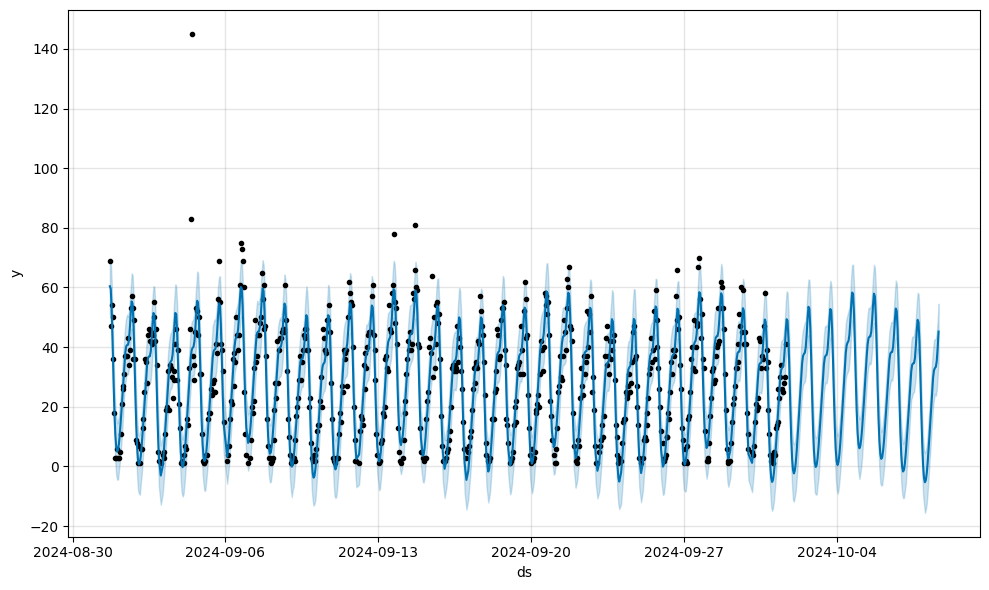

In [66]:
from prophet import Prophet

# Prepare the data for Prophet
order_counts_df = order_counts.reset_index()
order_counts_df.columns = ['ds', 'y']  # Rename columns to match Prophet's requirements
order_counts_df['ds'] = order_counts_df['ds'].dt.tz_localize(None)

# Initialize and fit the Prophet model
model = Prophet()
model.fit(order_counts_df)

# Create a dataframe for future dates
future = model.make_future_dataframe(periods=168, freq='H')  # 168 hours = 7 days

# Predict future order counts
forecast = model.predict(future)

# Plot the forecast
fig = model.plot(forecast)
fig.show()